# Tutorial

A quick tutorial on how to use the implementation and a comparison with the implementation by [Ni et al.](https://github.com/saibalmars/GraphRicciCurvature/tree/master?tab=readme-ov-file)

## Preparation

Import the packages we use and our implementation.

In [1]:
# Colab setting
!pip install GraphRicciCurvature

from curvature import lly_curvature_regular_graph, zero_ollivier_regular_graph
from util import graph_reader
from GraphRicciCurvature.OllivierRicci import OllivierRicci
import networkx as nx
import time
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

We load all 4-regular graphs on 14 vertices from the database generated by [GENREG](https://www.mathe2.uni-bayreuth.de/markus/reggraphs.html).

In [2]:
regular_graphs_14_4 = graph_reader("./regular_graph_database/14_4.txt")

## Ricci-Curvature

First, we compute the Lin-Lu-Yau curvature of a regular graph.

Lin-Lu-Yau curvature of the edge (1,2) is 1.25
Lin-Lu-Yau curvature of the edge (1,3) is 1.25
Lin-Lu-Yau curvature of the edge (1,4) is 1.0


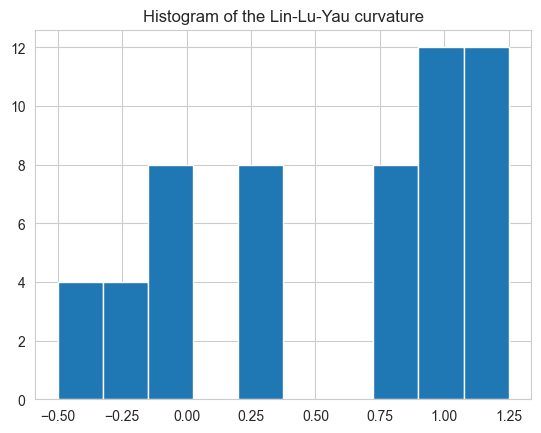

In [3]:
G = regular_graphs_14_4[0]
lin_lu_yau_curvature = lly_curvature_regular_graph(G)
for x, y in list(G.edges)[:3]:
    print('Lin-Lu-Yau curvature of the edge ({0},{1}) is {2}'.format(x,y,lin_lu_yau_curvature[(x,y)]))

plt.hist(lin_lu_yau_curvature.values())
plt.title("Histogram of the Lin-Lu-Yau curvature")
plt.show()

Similarly, we compute the $0$-Ollivier-Ricci curvature of a regular graph.

0-Ollivier-Ricci curvature of the edge (1,2) is 0.75
0-Ollivier-Ricci curvature of the edge (1,3) is 0.75
0-Ollivier-Ricci curvature of the edge (1,4) is 0.5


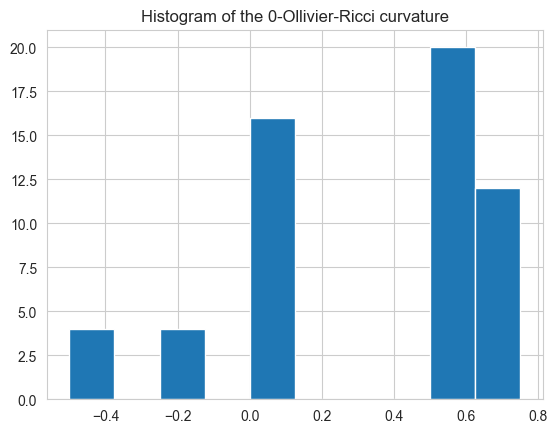

In [4]:
G = regular_graphs_14_4[0]
ollivier_curvature = zero_ollivier_regular_graph(G)
for x, y in list(G.edges)[:3]:
    print('0-Ollivier-Ricci curvature of the edge ({0},{1}) is {2}'.format(x,y,ollivier_curvature[(x,y)]))

plt.hist(ollivier_curvature.values())
plt.title("Histogram of the 0-Ollivier-Ricci curvature")
plt.show()

## Bone idle graphs and graphs with positive Ricci curvature

We use our implementation to identify all 4-regular bone idle graphs on 14 vertices.

  0%|          | 0/88168 [00:00<?, ?it/s]

There is 1 4-regular bone idle graph on 14 vertices


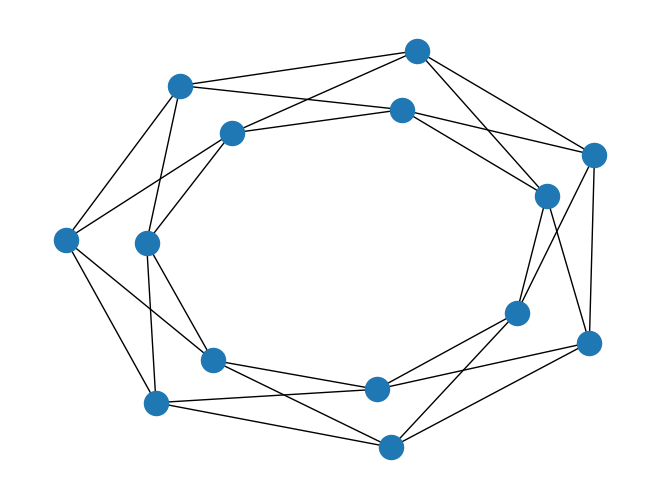

In [5]:
def bone_idle_graphs(graph_list):
    bone_idle_list = []
    for G in tqdm(graph_list):
        if all(v == 0 for v in lly_curvature_regular_graph(G).values()) and all(v == 0 for v in zero_ollivier_regular_graph(G).values()):
            bone_idle_list.append(G)
    return bone_idle_list

bone_idle_list = bone_idle_graphs(regular_graphs_14_4)
print("There is {} 4-regular bone idle graph on 14 vertices".format(len(bone_idle_list)))
nx.draw(bone_idle_list[0])

Similarly, we can use our implementation to identify all 4-regular graphs $G$ on 14 vertices with $Ric(G)>0$.

In [6]:
def positive_curvature_graphs(graph_list):
    pos_curvature = []
    for G in tqdm(graph_list):
        if all(v > 0 for v in lly_curvature_regular_graph(G).values()):
            pos_curvature.append(G)
    return pos_curvature

pos_curvature = positive_curvature_graphs(regular_graphs_14_4)
print("There are {} 4-regular graphs on 14 vertices with positive Lin-Lu-Yau curvature".format(len(pos_curvature)))

  0%|          | 0/88168 [00:00<?, ?it/s]

There are 9 4-regular graphs on 14 vertices with positive Lin-Lu-Yau curvature


## Comparison with the implementation by Ni et al.

We compare our implementation for calculating the Ricci curvature of a regular graph with the implementation by Ni et al.

In [7]:
avg_time_our = 0
avg_time_Ni = 0
for G in tqdm(regular_graphs_14_4[:1000]):
    t = time.time()
    lly_curvature_regular_graph(G)
    avg_time_our += time.time() - t

    t1 = time.time()
    orc = OllivierRicci(G, alpha=0.5, method="OTD",verbose="TRACE")
    orc.compute_ricci_curvature()
    #G_orc = orc.G.copy()
    avg_time_Ni += time.time() - t1

print("Average time with our implementation: {} seconds".format(avg_time_our/1000))
print("Average time with the implementation by Ni: {} seconds".format(avg_time_Ni/1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Average time with our implementation: 0.0011601579189300538 seconds
Average time with the implementation by Ni: 0.04061679840087891 seconds


The difference in performance makes it nearly impossible to classify all bone idle graphs or all graphs $G$ with $Ric(G)>0$ that are regular on 14 vertices using the implementation by Ni et al.